# Modelling and Analysis of the lending process if the credit facility process was completed via e-process

### Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import SelectKBest

### Reading Train and Test data

In [2]:
#importing training set and test set data
train=pd.read_csv(r'C:\Users\USER\Downloads\Data\train.csv')
test=pd.read_csv(r'C:\Users\USER\Downloads\Data\test.csv')

### Expository Data Analysis

#### Data consist of 5rows and 21 columns

In [3]:
train.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [4]:
train.tail()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
12511,7100872,31,weekly,0,3015,0,2,1,2,2,...,450,42450,0.643778,0.901396,0.632284,0.856231,0.666399,0.566399,6,1
12512,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
12513,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
12514,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1
12515,1498559,29,weekly,1,2665,0,4,10,4,1,...,600,64950,0.720889,0.874372,0.505565,0.631619,0.846163,0.846163,4,1


In [5]:
test.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
1,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
2,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
3,6493191,32,semi-monthly,0,5260,3,0,3,1,4,1,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3
4,8990111,61,bi-weekly,1,3270,0,4,0,4,3,1,400,61700,0.659736,0.937287,0.852323,0.785698,0.632466,0.732466,7


In [6]:
test.columns

Index(['Entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month'],
      dtype='object')

#### Amount of Data provided with respective datatypes

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [8]:
train.shape

(12516, 21)

#### Transpose Descriptive statistics of the dataset

In [9]:
train.describe()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.251600e+04,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000
mean,5.599485e+06,43.026766,0.425056,3654.110658,1.191355,3.532998,3.593161,3.402205,3.508469,0.795462,950.251518,61133.401246,0.690665,0.877954,0.582848,0.718456,0.621944,0.621912,6.494088,0.540588
std,2.563354e+06,11.865891,0.494371,1508.072163,2.404529,2.265293,2.749211,2.206649,1.959969,0.403380,706.915146,15396.809340,0.090294,0.054197,0.125260,0.121103,0.139876,0.139623,3.731870,0.498370
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.376885e+06,34.000000,0.000000,2575.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49450.000000,0.641221,0.850893,0.499887,0.635005,0.519794,0.519662,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3255.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699621,0.880993,0.588202,0.725717,0.624081,0.623781,6.000000,1.000000
75%,7.803325e+06,51.000000,1.000000,4661.250000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752053,0.911485,0.672431,0.806576,0.729609,0.728389,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,14.000000,1.000000,10200.000000,99750.000000,0.999997,0.999012,0.978932,0.993363,0.970249,0.966953,30.000000,1.000000


#### Checking for missing values

In [10]:
train.isnull().sum()

Entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

<AxesSubplot:title={'center':'Missing Data'}>

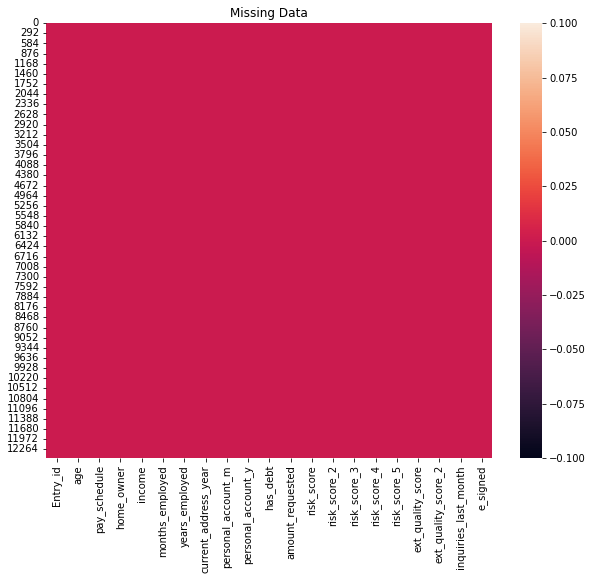

In [11]:
# visualise the missing data
plt.figure(figsize=(10,8))
plt.title('Missing Data')
sns.heatmap(train.isnull())

### Data Visualization: Showing relationships between features

In [12]:
# create a function to create a proper labels for the 'e_sign featured'

def not_e_signed(x):
    if x == 1:
        return 'Yes'
    else:
        return 'No'
train['e_signlabel'] = train['e_signed'].apply(not_e_signed)

Text(0, 0.5, 'count of Entry_id')

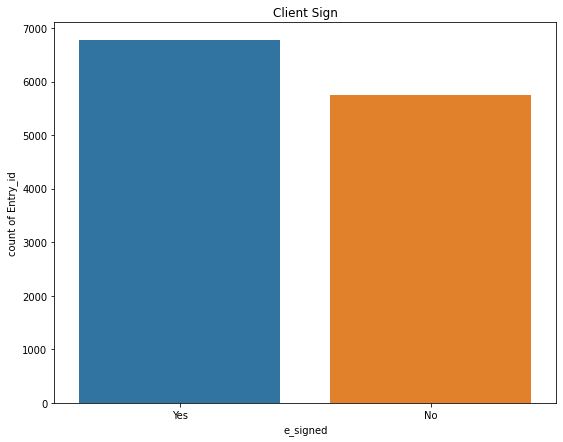

In [13]:
# a graphical visual to show the number of entry id that use e_sign 
plt.figure(figsize=(9,7))
plt.title('Client Sign')
sns.countplot(x='e_signlabel', data=train)
plt.xlabel('e_signed')
plt.ylabel('count of Entry_id')

In [14]:
# e_signed rate

e_signed_percentage = (train['e_signlabel'].value_counts()/train.shape[0]*100).round(2)
e_signed_percentage

Yes    54.06
No     45.94
Name: e_signlabel, dtype: float64

In [15]:
e_signed_count = train.groupby('e_signlabel')['e_signlabel'].count()
e_signed_count

e_signlabel
No     5750
Yes    6766
Name: e_signlabel, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

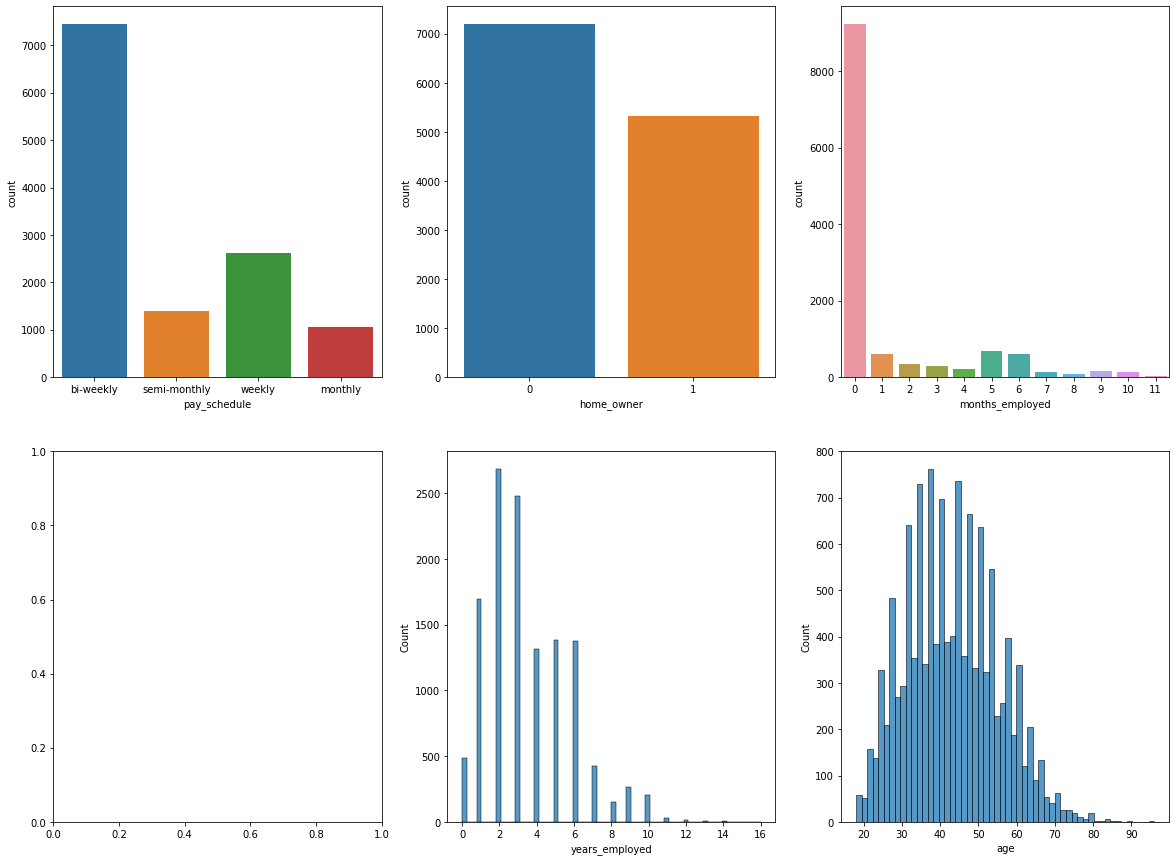

In [16]:
fig, axes = plt.subplots(2,3, figsize=(20,15))
# categorical variable

sns.countplot(x='pay_schedule', data=train, ax=axes[0,0])
sns.countplot(x='home_owner', data=train, ax=axes[0,1])
sns.countplot(x='months_employed', data=train, ax=axes[0,2])

# numerical variable
sns.histplot(x='years_employed', data=train, ax=axes[1,1])
sns.histplot(x='age', data=train, ax=axes[1,2])



<AxesSubplot:xlabel='age', ylabel='Count'>

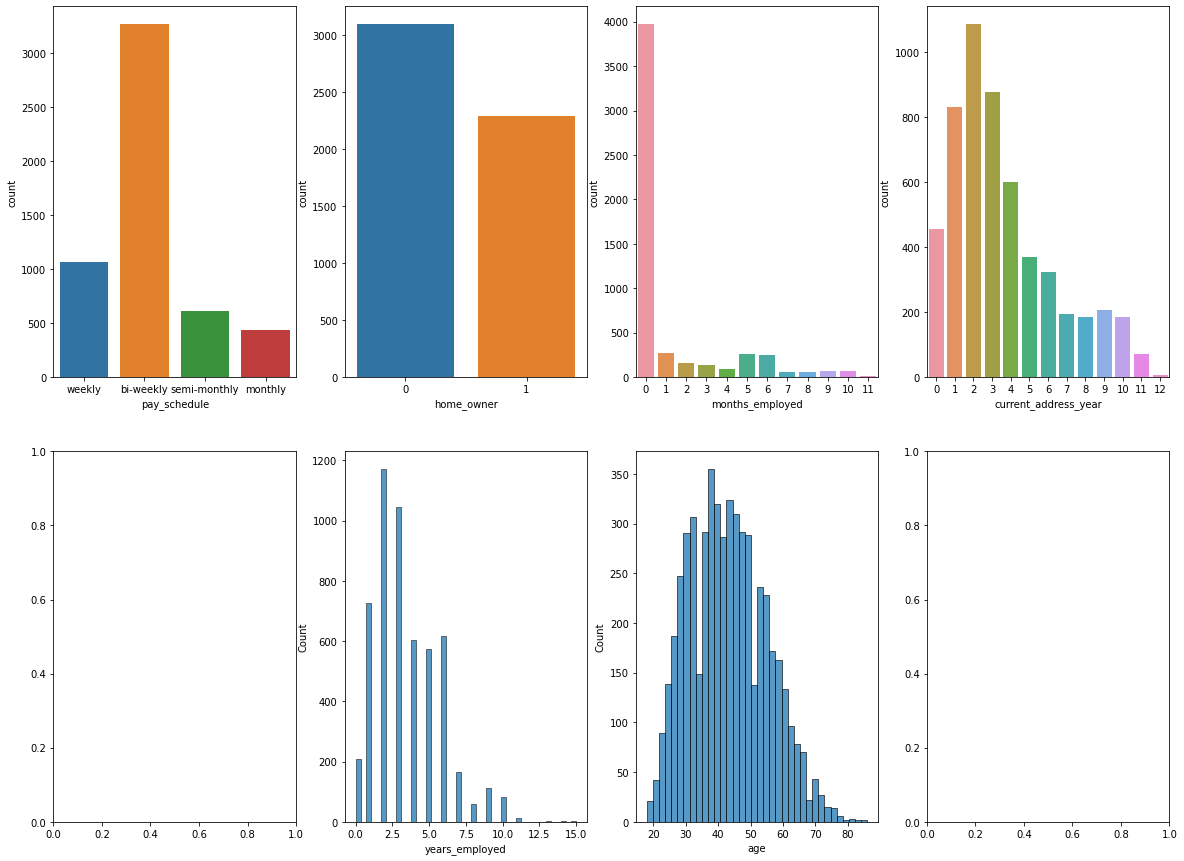

In [17]:
fig, axes = plt.subplots(2,4, figsize=(20,15))
# categorical variable

sns.countplot(x='pay_schedule', data=test, ax=axes[0,0])
sns.countplot(x='home_owner', data=test, ax=axes[0,1])
sns.countplot(x='months_employed', data=test, ax=axes[0,2])
sns.countplot(x='current_address_year', data=test, ax=axes[0,3])

# numerical variable
sns.histplot(x='years_employed', data=test, ax=axes[1,1])
sns.histplot(x='age', data=test, ax=axes[1,2])



### Comparing two variables
By combining categorical vs categorical

Text(0, 0.5, 'count of Entry_id')

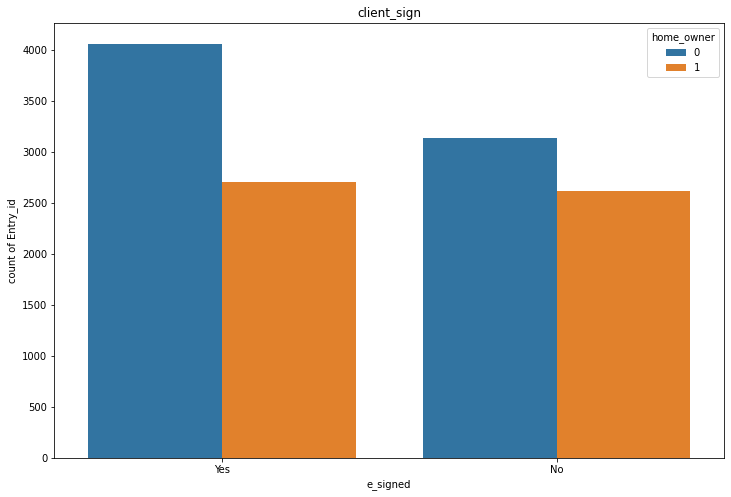

In [18]:

# WHAT IS THE e_signed rate by home owner

plt.figure(figsize=(12,8))
plt.title('client_sign')
sns.countplot(x='e_signlabel', data=train, hue='home_owner')
plt.xlabel('e_signed')
plt.ylabel('count of Entry_id')


Text(0, 0.5, 'count of Entry_id')

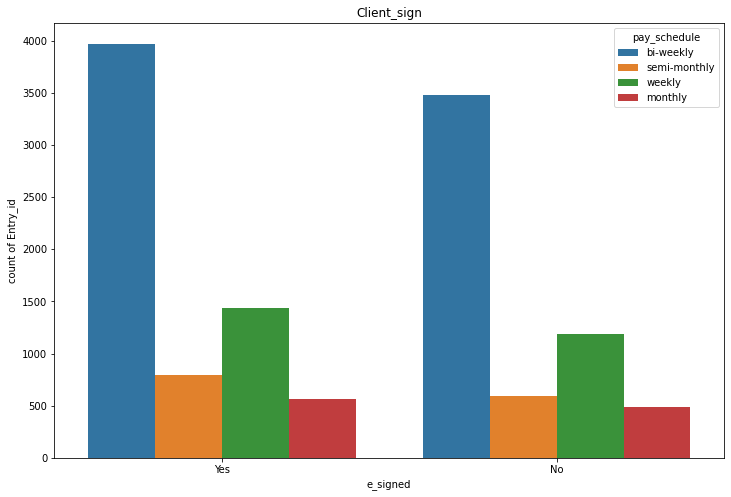

In [19]:
# pay_schedule by e_sign

plt.figure(figsize=(12,8))
plt.title('Client_sign')
sns.countplot(x='e_signlabel', data=train, hue='pay_schedule')
plt.xlabel('e_signed')
plt.ylabel('count of Entry_id')


<AxesSubplot:xlabel='years_employed', ylabel='age'>

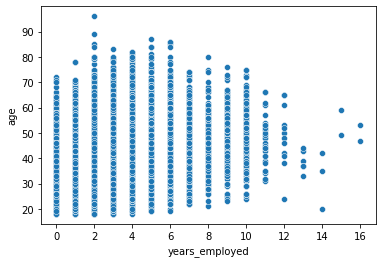

In [20]:
# is there any relationship between years_employed and age

sns.scatterplot(x=train['years_employed'], y=train['age'])

In [ ]:
sns.pairplot(train)

In [ ]:
sns.pairplot(test)

### Data balancing and preprocessing

#### Balancing data to be used to develop model

In [23]:
train['e_signed'].value_counts()

1    6766
0    5750
Name: e_signed, dtype: int64

In [24]:
train0=train[train['e_signed']==0]
train0.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,e_signlabel
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,No
11,9375601,29,bi-weekly,0,1515,6,1,0,5,2,...,56600,0.744604,0.852992,0.340333,0.533661,0.374144,0.374144,6,0,No
15,1403171,62,bi-weekly,0,3240,1,6,6,3,6,...,68650,0.720442,0.812713,0.647687,0.733741,0.446364,0.446364,4,0,No
17,3884169,35,weekly,1,5220,1,5,5,8,3,...,62350,0.669209,0.881060,0.504127,0.648170,0.535607,0.735607,6,0,No
21,7769592,48,bi-weekly,0,3635,0,3,2,2,4,...,48350,0.646338,0.808179,0.559529,0.755586,0.444159,0.644159,3,0,No


In [25]:
train1=train[train['e_signed']==1]
train1.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,e_signlabel
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,Yes
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1,Yes
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1,Yes
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1,Yes
5,8908605,51,bi-weekly,1,3055,0,6,11,4,2,...,59750,0.624666,0.968565,0.509919,0.749624,0.758607,0.758607,5,1,Yes


In [26]:
train1=train1[:5750]

In [27]:
train0.shape,train1.shape

((5750, 22), (5750, 22))

In [28]:
Total = train0.append(train1)

C:\Users\USER\AppData\Local\Temp\ipykernel_11980\1048124949.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Total = train0.append(train1)


In [29]:
Total.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,e_signlabel
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,No
11,9375601,29,bi-weekly,0,1515,6,1,0,5,2,...,56600,0.744604,0.852992,0.340333,0.533661,0.374144,0.374144,6,0,No
15,1403171,62,bi-weekly,0,3240,1,6,6,3,6,...,68650,0.720442,0.812713,0.647687,0.733741,0.446364,0.446364,4,0,No
17,3884169,35,weekly,1,5220,1,5,5,8,3,...,62350,0.669209,0.881060,0.504127,0.648170,0.535607,0.735607,6,0,No
21,7769592,48,bi-weekly,0,3635,0,3,2,2,4,...,48350,0.646338,0.808179,0.559529,0.755586,0.444159,0.644159,3,0,No


In [30]:
#Assigning x and y training values with x test values
Total['pay_schedule']=Total['pay_schedule'].astype('category')
Total['pay_schedule']=Total['pay_schedule'].cat.codes
test['pay_schedule']=test['pay_schedule'].astype('category')
test['pay_schedule']=test['pay_schedule'].cat.codes
x_train=Total.drop(['e_signed','e_signlabel'],axis=1)
y_train=Total['e_signed']
x_test=test

In [31]:
#Selecting the best features in the dataset
selector2=SelectKBest(k=11)
new_x=selector2.fit_transform(x_train,y_train)
new_x.shape

(11500, 11)

In [32]:
filter=selector2.get_support()
features=Total.columns.drop(['e_signed','e_signlabel'])
features[filter]

Index(['age', 'home_owner', 'income', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_3', 'ext_quality_score', 'inquiries_last_month'],
      dtype='object')

In [33]:
x_train=Total[['age', 'home_owner', 'income', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_3', 'ext_quality_score', 'inquiries_last_month']]
y_train=Total['e_signed']
x_test=test[['age', 'home_owner', 'income', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_3', 'ext_quality_score', 'inquiries_last_month']]

### Building the model

In [34]:
model=[('dt',DecisionTreeClassifier()),('rf',make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=500)))]

In [35]:
model=StackingClassifier(estimators=model)

In [36]:
model.fit(x_train,y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('rf',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(n_estimators=500))]))])

In [37]:
y_pred=model.predict(x_test)

In [38]:
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [39]:
pred=pd.DataFrame(y_pred)
ds=pd.concat([test['Entry_id'],pred],axis=1)
ds.columns=['Entry_id','e_signed']
ds.to_csv('Submission.csv',index=False)